In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df = pd.read_csv('advertising.csv')
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Visualizing  important characteristics of a dataset

C:\Users\noopa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


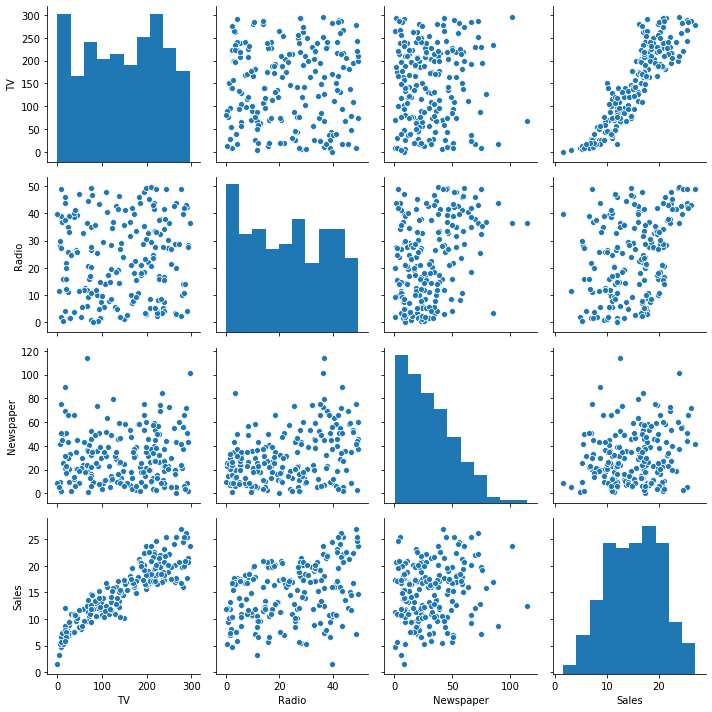

In [10]:
cols = ['TV', 'Radio', 'Newspaper', 'Sales']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

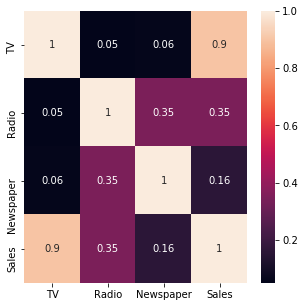

In [14]:
plt.subplots(figsize=(5,5))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Using regularized methods for regression

In [15]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_train_predr = ridge.predict(X_train)
y_test_predr = ridge.predict(X_test)
print(ridge.coef_)

[0.05365016 0.11073025 0.00203705]


In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_predr),
        mean_squared_error(y_test, y_test_predr)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_predr),
        r2_score(y_test, y_test_predr)))

MSE train: 2.198, test: 3.938
R^2 train: 0.916, test: 0.869


In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_predl = lasso.predict(X_train)
y_test_predl = lasso.predict(X_test)
print(lasso.coef_)

[0.0536441  0.11036151 0.00188528]


In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_predl),
        mean_squared_error(y_test, y_test_predl)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_predl),
        r2_score(y_test, y_test_predl)))

MSE train: 2.198, test: 3.935
R^2 train: 0.916, test: 0.869
